# IMDB MOVIES RATING 

This Example shows the use of various algorithms of machine learning . The goal of this project is find which algorithm gives maximum accuracy of determining the movie rate given by imdb depending on its metascore and votes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import graphviz

In [2]:
%matplotlib inline

# Data Analysis

In [3]:
rate=pd.read_csv("movie_ratings.csv")
rate.head()

Unnamed: 0                movie  year  imdb  metascore    votes
0           0            Gladiator  2000   8.5       67.0  1187559
1           1              Memento  2000   8.5       80.0  1014199
2           2               Snatch  2000   8.3        NaN   707162
3           3  Requiem for a Dream  2000   8.3       68.0   688394
4           4                X-Men  2000   7.4       64.0   526411

In [4]:
rate.shape

(1800, 6)

In [5]:
rate.dtypes

Unnamed: 0      int64
movie          object
year            int64
imdb          float64
metascore     float64
votes           int64
dtype: object

In [6]:
df=pd.DataFrame(rate)
df.isnull().sum()

Unnamed: 0      0
movie           0
year            0
imdb            0
metascore     850
votes           0
dtype: int64

In [7]:
df.metascore.mean()

74.28

In [8]:
df["metascore"].fillna(value="74.0",inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0    0
movie         0
year          0
imdb          0
metascore     0
votes         0
dtype: int64

In [10]:
df['metascore']=df.metascore.astype(float)

In [11]:
df.dtypes

Unnamed: 0      int64
movie          object
year            int64
imdb          float64
metascore     float64
votes           int64
dtype: object

In [12]:
y=df["imdb"]
X=df.drop(["Unnamed: 0","movie","year","imdb"],axis=1)

In [13]:
pca=PCA(n_components=1)
k=np.array(X)
X=pca.fit_transform(k)
X

array([[ 869922.72439921],
       [ 696562.72446471],
       [ 389525.72443909],
       ...,
       [-206443.27554894],
       [-211307.27555376],
       [-211398.275544  ]])

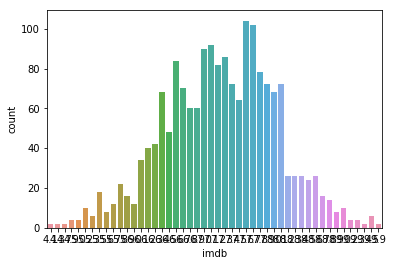

In [14]:
sns.countplot(x="imdb",data=df)

# LINEAR REGRESSION ALGORITHM

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=11)

In [16]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

y_pred=regr.predict(X_test)

In [17]:
t=pd.DataFrame(y_pred,y_test)
t.head()

0
imdb          
6.7   6.968985
5.7   7.115574
7.7   6.995577
7.6   7.091535
8.2   7.372842

In [18]:
print('Coefficients :\n',regr.coef_)
print("Mean squared error: %.2f"
     %mean_squared_error(y_test,y_pred))

print('Variance score : %.2f' % r2_score(y_test,y_pred))

Coefficients :
 [0.33374127]
Mean squared error: 0.52
Variance score : 0.24


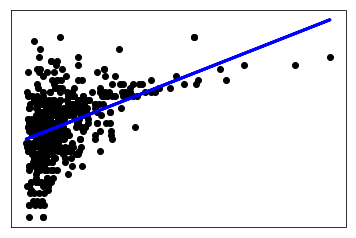

In [19]:
plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,y_pred,color='blue',linewidth=3);

plt.xticks(())
plt.yticks(())
plt.show()

We can see the variance score is too low. 

Target of the given datasets is continuous. Now for testing other classes first we have to convert it into multivariant classes.

In [20]:
y=np.array(y)
k=list(y)

In [21]:
def movierate(*k):
    p=k
    out=[ ]
    for i in p:
        if i<=10 and i>9:
            out.append(1)
        elif i<=9 and i>7.5:
            out.append(2)
        elif i<=7.5 and i<6:
            out.append(3)
        elif i<=6 and i>5:
            out.append(4)
        else:
            out.append(-1)
                
    return out

y=movierate(*k)
y

[2,
 2,
 2,
 2,
 -1,
 2,
 2,
 -1,
 -1,
 -1,
 2,
 -1,
 2,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 2,
 2,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 3,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 3,
 3,
 3,
 2,
 -1,
 3,
 -1,
 2,
 -1,
 2,
 -1,
 3,
 -1,
 -1,
 -1,
 2,
 2,
 2,
 2,
 -1,
 2,
 2,
 -1,
 -1,
 -1,
 2,
 -1,
 2,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 2,
 2,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 3,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 3,
 3,
 3,
 2,
 -1,
 3,
 -1,
 2,
 -1,
 2,
 -1,
 3,
 -1,
 -1,
 -1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 -1,
 2,
 1,
 -1,
 2,
 -1,
 -1,
 3,
 2,
 2,
 -1,
 -1,
 -1,
 -1,
 2,
 2,
 2,
 -1,
 3,
 3,
 -1,
 -1,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 3,
 2,
 -1,
 3,
 -1,
 -1,
 -1,
 2,
 -1,
 -1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 -1,
 2,
 1,
 -1,
 2,
 -1,
 -1,
 3,
 2,
 2,
 -1,
 -1,
 -1,
 -1,
 2,
 2,
 2,
 -1,
 3,
 3,
 -1,
 -1,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 3,
 2,
 -1,
 3,
 -1,
 -1,
 -1,
 2,
 -1,
 -1,
 2,
 2,
 2,
 2,
 -1,
 2,
 -1,
 -1,
 2,
 2,
 -1,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1

# LOGISTIC REGRESSION ALGORITHM

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Niraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Niraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
prediction=logmodel.predict(X_test)
prediction

array([-1,  2, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1,  2, -1,  2, -1,
       -1, -1, -1,  2,  2, -1, -1, -1,  2, -1, -1, -1,  2, -1, -1, -1, -1,
       -1,  2, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,
        2, -1, -1,  2, -1, -1, -1, -1, -1,  2,  2,  2,  2, -1, -1, -1, -1,
       -1,  2, -1,  2, -1, -1, -1,  2, -1,  2, -1,  2,  2, -1, -1,  2, -1,
       -1, -1, -1, -1, -1,  2, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1,  2,
       -1,  2, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1,
       -1, -1,  2, -1, -1,  2, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1,
       -1,  2, -1,  2,  2, -1, -1, -1, -1,  2, -1, -1,  2, -1, -1,  2, -1,
        2, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2,  2, -1, -1, -1, -1,  2, -1, -1,  2, -1, -1,
        2, -1, -1, -1, -1,  2, -1,  2, -1, -1,  2,  2, -1, -1, -1, -1, -1,
       -1,  2,  2,  2, -1

In [24]:
pd.DataFrame(prediction,y_test)

0
-1 -1
 2  2
 3 -1
 2 -1
-1 -1
-1 -1
 2  2
 2 -1
-1 -1
-1 -1
-1 -1
-1 -1
 2 -1
 2  2
-1 -1
 2  2
-1 -1
 2 -1
-1 -1
 2 -1
-1  2
 2  2
-1 -1
 2 -1
 2 -1
-1  2
-1 -1
 2 -1
 2 -1
-1  2
.. ..
 2  2
 2 -1
 3 -1
-1 -1
 2  2
 2 -1
 3 -1
-1  2
 2  2
 3 -1
 2  2
-1 -1
-1 -1
-1 -1
-1 -1
 2  2
 2 -1
-1 -1
 2 -1
-1  2
 3 -1
-1 -1
-1  2
 2  2
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
 2 -1

[540 rows x 1 columns]

In [25]:
het=pd.DataFrame(confusion_matrix(y_test,prediction))
het

0  1   2  3  4
0  279  0  27  0  0
1    3  0   3  0  0
2  110  0  89  0  0
3   24  0   0  0  0
4    5  0   0  0  0

In [26]:
accuracy_score(y_test,prediction)*100

68.14814814814815

# KNN (KNearestNeighbour Algorithm) 

In [27]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[235,   0,  61,  10,   0],
       [  3,   0,   3,   0,   0],
       [ 75,   0, 121,   3,   0],
       [ 17,   1,   1,   5,   0],
       [  5,   0,   0,   0,   0]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

66.85185185185185

# DECISION TREE 

In [31]:
dtree = DecisionTreeClassifier( criterion = 'entropy', random_state = 0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [32]:
y_pred = dtree.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[260,   0,  36,  10,   0],
       [  2,   2,   2,   0,   0],
       [ 30,   0, 167,   2,   0],
       [  2,   0,   2,  20,   0],
       [  4,   0,   0,   0,   1]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

83.33333333333334

In [35]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# RANDOM FOREST

In [36]:
classifier = RandomForestClassifier(n_estimators = 2000,n_jobs=10000, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=10000,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [37]:
y_pred=classifier.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[260,   0,  36,  10,   0],
       [  2,   2,   2,   0,   0],
       [ 30,   0, 167,   2,   0],
       [  2,   0,   2,  20,   0],
       [  4,   0,   0,   0,   1]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

83.33333333333334

# We can conclude that Decision tree and Random Forest algorithm gives us the best accuracy score.